In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import re
import imageio

import matplotlib.cm as cm
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cm.Dark2.colors)

In [5]:
# Function to load CSV and add columns from filename
def load_and_add_columns(file_path, type):
    print (file_path)
    # Load the CSV file

    # if ("mbb" in file_path):
    if type == 0:
        df = pd.read_csv(file_path, names=["event_id", "T1_gen", "costheta_gen", "T1_reco", "costheta_reco", "node_dist"])
    else:
        df = pd.read_csv(file_path)
    # else:
        # df = pd.read_csv(file_path, names=["event_id", "T1_gen", "costheta_gen", "T1_reco", "costheta_reco", "e_gamma"])
        # display(df)
    
    # Extract <Model>, <NME>, <Pressure>, and <binsize> from the filename
    match = re.match(pattern, file_path)
    
    if match:
        model, nme, pressure, binsize = match.groups()
        print(model,nme,pressure, binsize)
        df['Model'] = model
        df['nme'] = nme
        df['Pressure'] = pressure
        df['binsize'] = binsize
    else:
        print(f"Filename does not match the expected pattern: {file_path}")

    df["event_id"] =  df['event_id'].astype(int)
    df = df.sort_values(by='event_id')
    
    return df

In [6]:
files =  sorted(glob.glob("../files/simplereco/*"))

dfs = []

print(files)

pattern = r'.*/([a-zA-Z0-9]+)_([a-zA-Z0-9]+)_([0-9]+bar)_([0-9]+mm)\.txt'

for f in files:
    df = load_and_add_columns(f, 1)
    dfs.append(df)

dfs = pd.concat(dfs)

display(dfs[   (dfs.Model =="mbb") & (dfs.binsize == "1mm")  & (dfs.Pressure == "5bar")] )



files =  sorted(glob.glob("../files/reco2/*"))

dfs_new = []

print(files)

pattern = r'.*/([a-zA-Z0-9]+)_([a-zA-Z0-9]+)_([0-9]+bar)_([0-9]+mm)_smear_reco_merged\.txt'

for f in files:
    df = load_and_add_columns(f, 0)
    dfs_new.append(df)

dfs_new = pd.concat(dfs_new)



['../files/simplereco/mbb_SM_10bar_10mm.txt', '../files/simplereco/mbb_SM_10bar_1mm.txt', '../files/simplereco/mbb_SM_10bar_2mm.txt', '../files/simplereco/mbb_SM_10bar_4mm.txt', '../files/simplereco/mbb_SM_15bar_10mm.txt', '../files/simplereco/mbb_SM_15bar_1mm.txt', '../files/simplereco/mbb_SM_15bar_2mm.txt', '../files/simplereco/mbb_SM_15bar_4mm.txt', '../files/simplereco/mbb_SM_1bar_10mm.txt', '../files/simplereco/mbb_SM_1bar_1mm.txt', '../files/simplereco/mbb_SM_1bar_2mm.txt', '../files/simplereco/mbb_SM_1bar_4mm.txt', '../files/simplereco/mbb_SM_5bar_10mm.txt', '../files/simplereco/mbb_SM_5bar_1mm.txt', '../files/simplereco/mbb_SM_5bar_2mm.txt', '../files/simplereco/mbb_SM_5bar_4mm.txt']
../files/simplereco/mbb_SM_10bar_10mm.txt
mbb SM 10bar 10mm
../files/simplereco/mbb_SM_10bar_1mm.txt
mbb SM 10bar 1mm
../files/simplereco/mbb_SM_10bar_2mm.txt
mbb SM 10bar 2mm
../files/simplereco/mbb_SM_10bar_4mm.txt
mbb SM 10bar 4mm
../files/simplereco/mbb_SM_15bar_10mm.txt
mbb SM 15bar 10mm
../fi

,event_id,T1_gen,costheta_gen,T1_true,costheta_true,T1_reco,costheta_reco,Model,nme,Pressure,binsize
0,25,1.665003,-0.434078,0.0,0.0,1.666300,-0.431280,mbb,SM,5bar,1mm
1,26,1.847120,-0.232776,0.0,0.0,1.847275,-0.186968,mbb,SM,5bar,1mm
2,27,2.110709,-0.902167,0.0,0.0,2.417050,-0.834376,mbb,SM,5bar,1mm
3,28,1.679241,0.512825,0.0,0.0,1.747787,0.577486,mbb,SM,5bar,1mm
4,29,1.987653,-0.199094,0.0,0.0,2.211662,-0.250346,mbb,SM,5bar,1mm
...,...,...,...,...,...,...,...,...,...,...,...
4307,9795,1.677766,-0.317188,0.0,0.0,1.677038,-0.350750,mbb,SM,5bar,1mm
4308,9796,2.015860,-0.383437,0.0,0.0,2.015888,-0.507374,mbb,SM,5bar,1mm
4309,9797,1.715920,0.614081,0.0,0.0,1.332938,0.459266,mbb,SM,5bar,1mm
4310,9798,2.440091,0.307972,0.0,0.0,2.447650,0.999871,mbb,SM,5bar,1mm


['../files/reco2/Leptoquark_SM_10bar_10mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_10bar_1mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_10bar_2mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_10bar_4mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_15bar_10mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_15bar_1mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_15bar_2mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_15bar_4mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_1bar_10mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_1bar_1mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_1bar_2mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_1bar_4mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_5bar_10mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_5bar_1mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_5bar_2mm_smear_reco_merged.txt', '../files/reco2/Leptoquark_SM_5bar_4mm_sme

In [7]:
def PlotHist(dfs, varname, model, nme, binsize, pressure, ax, norm, useLog, bins_, xlabel, ylabel, labelling):

    if (labelling == "binsize"):
        label = f"{model} {nme} {binsize}"
        title = pressure
    elif (labelling == "pressure"):
        label = f"{model} {nme} {pressure}"
        title = binsize
    else:
        label = labelling
        title = pressure

    query = dfs[ (dfs.Model == model) & (dfs.nme == nme) & (dfs.Pressure == pressure) & (dfs.binsize == binsize) ]
    ax.hist(query[varname], bins = bins_, density=norm, log=useLog, histtype="step", label = label, linewidth=2);
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.legend()
    ax.set_title(title)
    ax.set_ylim(0, 1.4)

def PlotHistGen(dfs, varname, model, nme, binsize, pressure, ax, norm, useLog, bins_, xlabel, ylabel):
    query = dfs[ (dfs.Model == model) & (dfs.nme == nme) & (dfs.Pressure == pressure) & (dfs.binsize == binsize) ]
    ax.hist(query[varname], bins = bins_, density=norm, log=useLog, histtype="step", label = f"Gen", linewidth=2, color = "k");
    ax.legend()

def PlotHistDiff(dfs, varname,genvarname, model, nme, binsize, pressure, ax, norm, useLog, bins_, xlabel, ylabel, labelling):

    if (labelling == "binsize"):
        label = f"{model} {nme} {binsize}"
        title = pressure
    elif (labelling == "pressure"):
        label = f"{model} {nme} {pressure}"
        title = binsize
    else:
        label = labelling
        title = pressure

    query = dfs[ (dfs.Model == model) & (dfs.nme == nme) & (dfs.Pressure == pressure) & (dfs.binsize == binsize) ]
    ax.hist(query[varname] - query[genvarname] , bins = bins_, density=norm, log=useLog, histtype="step", label = label, linewidth=2);
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.legend()
    ax.set_title(title)
    # ax.set_ylim(0,4)
    

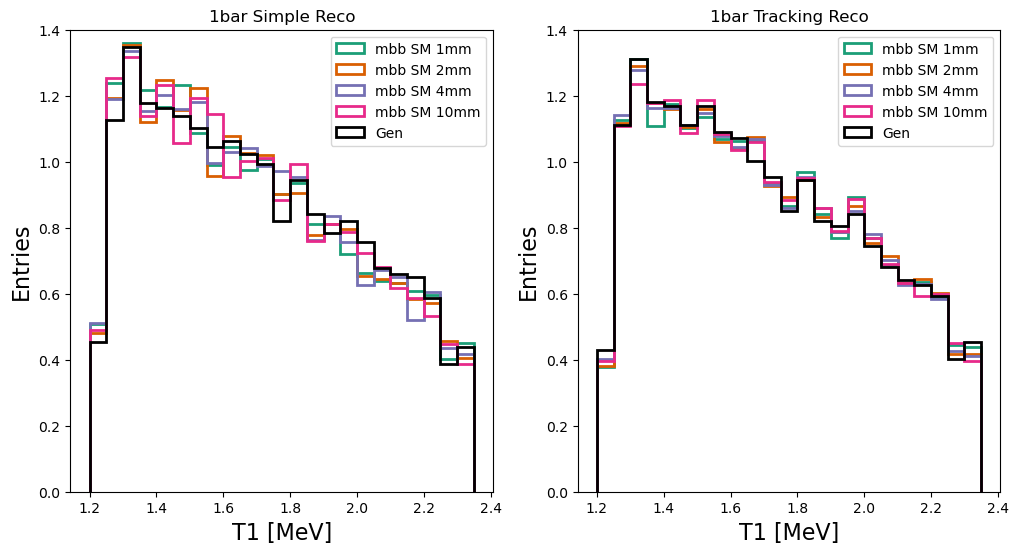

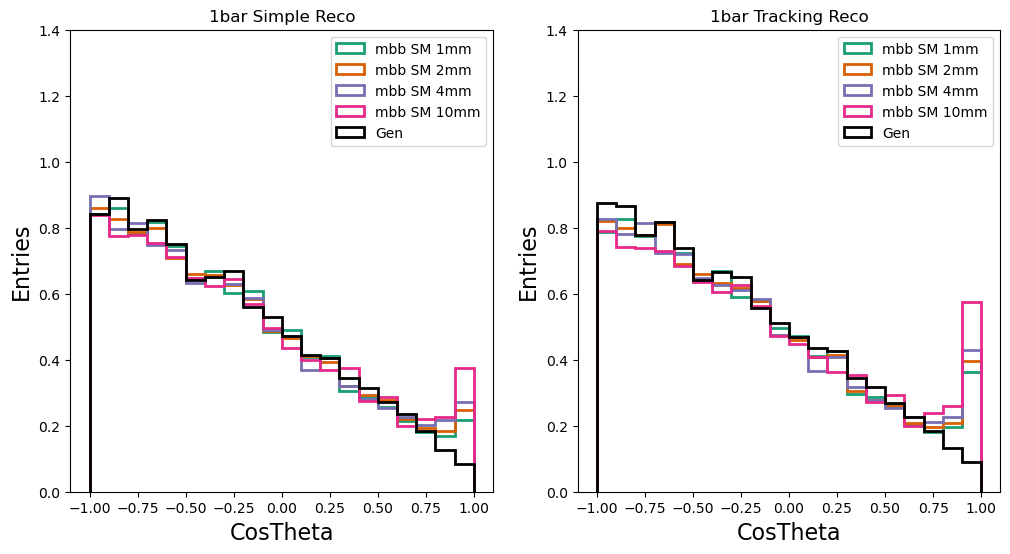

In [8]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
useLog=False
norm=True

pressure = "1bar"

for bs in ["1mm", "2mm", "4mm", "10mm"]:
    PlotHist(dfs,    "T1_reco", "mbb", "SM", bs,pressure, ax1, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries", "binsize")
    ax1.set_title(pressure+" Simple Reco")
    PlotHist(dfs_new,    "T1_reco", "mbb", "SM", bs,pressure, ax2, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries", "binsize")
    ax2.set_title(pressure+" Tracking Reco")

PlotHistGen(dfs, "T1_gen",  "mbb", "SM", "1mm",pressure, ax1, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries")
PlotHistGen(dfs_new, "T1_gen",  "mbb", "SM", "1mm",pressure, ax2, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries")

plt.savefig(f"../files/plots/AlgoComparisons/T1_SM_{pressure}.png", dpi=200)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
for bs in ["1mm", "2mm", "4mm", "10mm"]:
    PlotHist(dfs,    "costheta_reco", "mbb", "SM", bs,pressure, ax1, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries", "binsize")
    ax1.set_title(pressure+" Simple Reco")
    PlotHist(dfs_new,    "costheta_reco", "mbb", "SM", bs,pressure, ax2, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries", "binsize")
    ax2.set_title(pressure+" Tracking Reco")

PlotHistGen(dfs, "costheta_gen", "mbb", "SM",  "1mm",pressure, ax1, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries")
PlotHistGen(dfs_new, "costheta_gen",  "mbb", "SM", "1mm",pressure, ax2, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries")

plt.savefig(f"../files/plots/AlgoComparisons/Costheta_SM_{pressure}.png", dpi=200)

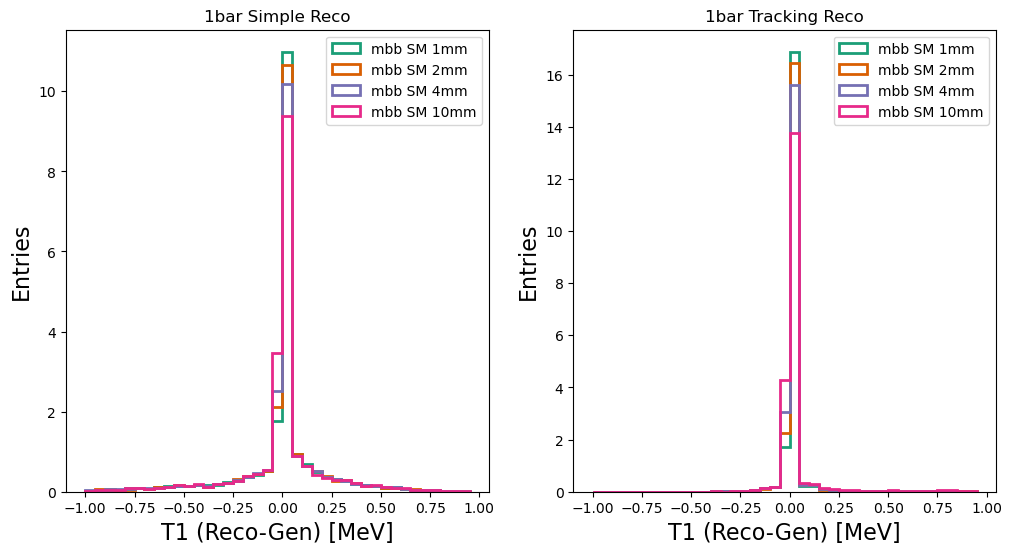

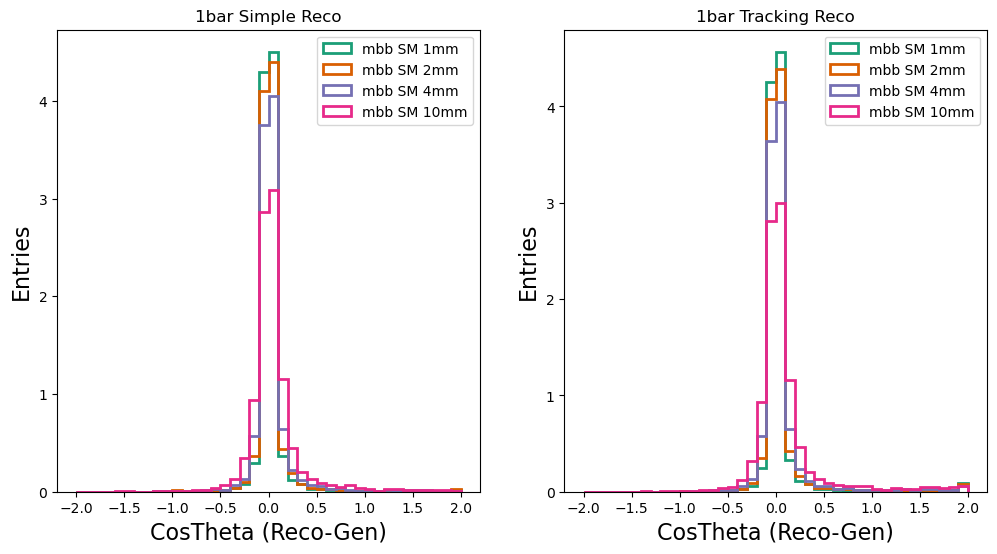

In [9]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
useLog=False
norm=True


for bs in ["1mm", "2mm", "4mm", "10mm"]:
    PlotHistDiff(dfs,    "T1_reco", "T1_gen", "mbb", "SM", bs, pressure, ax1, norm, useLog,  np.arange(-1,1,0.05), "T1 (Reco-Gen) [MeV]", "Entries", "binsize")
    ax1.set_title(pressure+" Simple Reco")
    PlotHistDiff(dfs_new,    "T1_reco", "T1_gen", "mbb", "SM", bs, pressure, ax2, norm, useLog, np.arange(-1,1,0.05), "T1 (Reco-Gen) [MeV]", "Entries", "binsize")
    ax2.set_title(pressure+" Tracking Reco")

plt.savefig(f"../files/plots/T1_diff_SM_{pressure}.png", dpi=200)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
for bs in ["1mm", "2mm", "4mm", "10mm"]:
    PlotHistDiff(dfs,    "costheta_reco","costheta_gen", "mbb", "SM", bs, pressure, ax1, norm, useLog, np.arange(-2,2.1,0.1), "CosTheta (Reco-Gen)", "Entries", "binsize")
    ax1.set_title(pressure+" Simple Reco")
    PlotHistDiff(dfs_new,    "costheta_reco","costheta_gen", "mbb", "SM", bs, pressure, ax2, norm, useLog,  np.arange(-2,2.1,0.1), "CosTheta (Reco-Gen)", "Entries", "binsize")
    ax2.set_title(pressure+" Tracking Reco")

plt.savefig(f"../files/plots/Costheta_diff_SM_{pressure}.png", dpi=200)

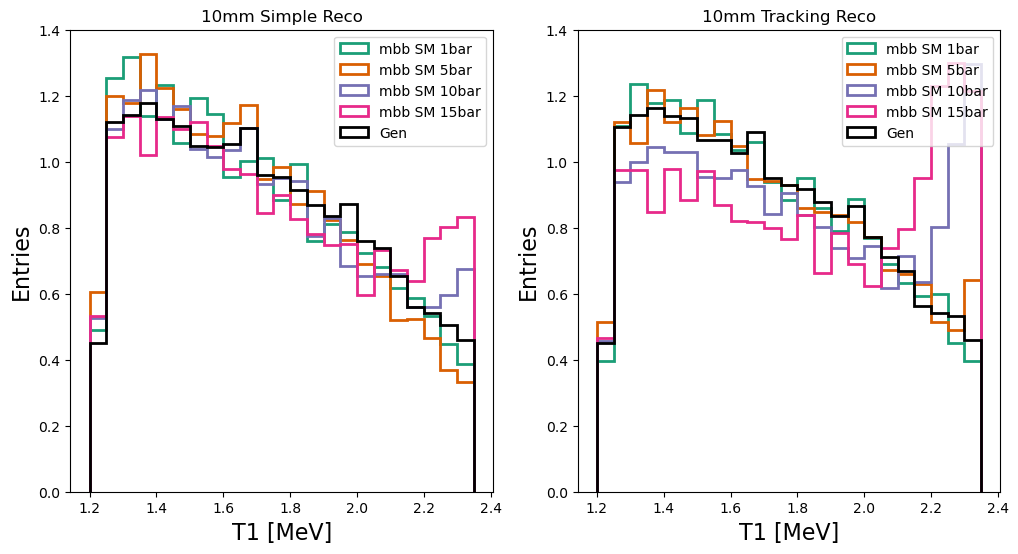

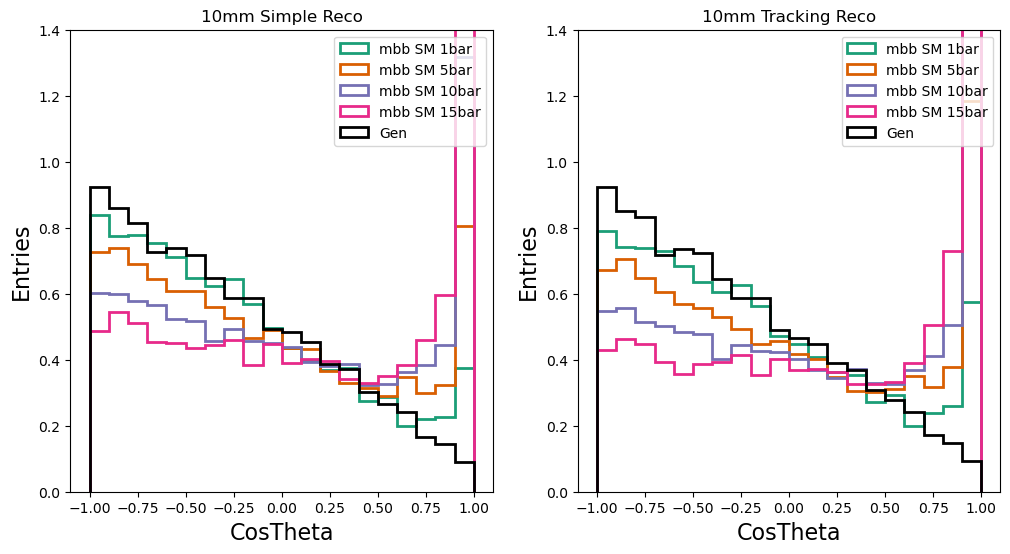

In [10]:
# Compare pressures
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
useLog=False
norm=True

binsize = "10mm"

for p in ["1bar", "5bar", "10bar", "15bar"]:
    PlotHist(dfs,    "T1_reco", "mbb", "SM", binsize, p, ax1, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries", "pressure")
    ax1.set_title(binsize+" Simple Reco")
    PlotHist(dfs_new,    "T1_reco", "mbb", "SM", binsize, p, ax2, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries", "pressure")
    ax2.set_title(binsize+" Tracking Reco")

PlotHistGen(dfs, "T1_gen",  "mbb", "SM", "1mm", "5bar", ax1, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries")
PlotHistGen(dfs_new, "T1_gen",  "mbb", "SM", "1mm","5bar", ax2, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries")

plt.savefig(f"../files/plots/T1_SM_{binsize}.png", dpi=200)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))

for p in ["1bar", "5bar", "10bar", "15bar"]:
    PlotHist(dfs,    "costheta_reco", "mbb", "SM", binsize,p, ax1, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries", "pressure")
    ax1.set_title(binsize+" Simple Reco")
    PlotHist(dfs_new,    "costheta_reco", "mbb", "SM", binsize,p, ax2, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries", "pressure")
    ax2.set_title(binsize+" Tracking Reco")

PlotHistGen(dfs, "costheta_gen", "mbb", "SM",  "1mm","5bar", ax1, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries")
PlotHistGen(dfs_new, "costheta_gen",  "mbb", "SM", "1mm","5bar", ax2, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries")

plt.savefig(f"../files/plots/Costheta_SM_{binsize}.png", dpi=200)

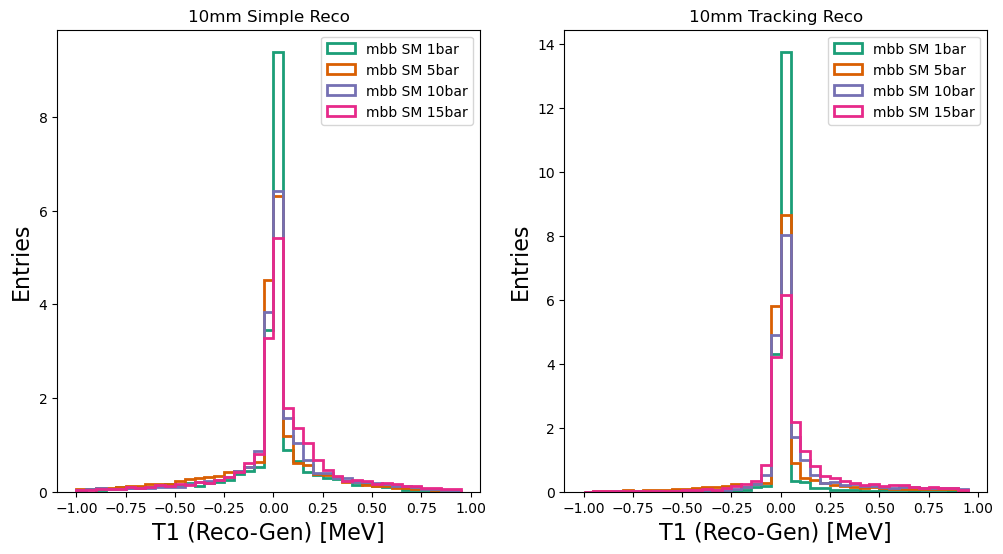

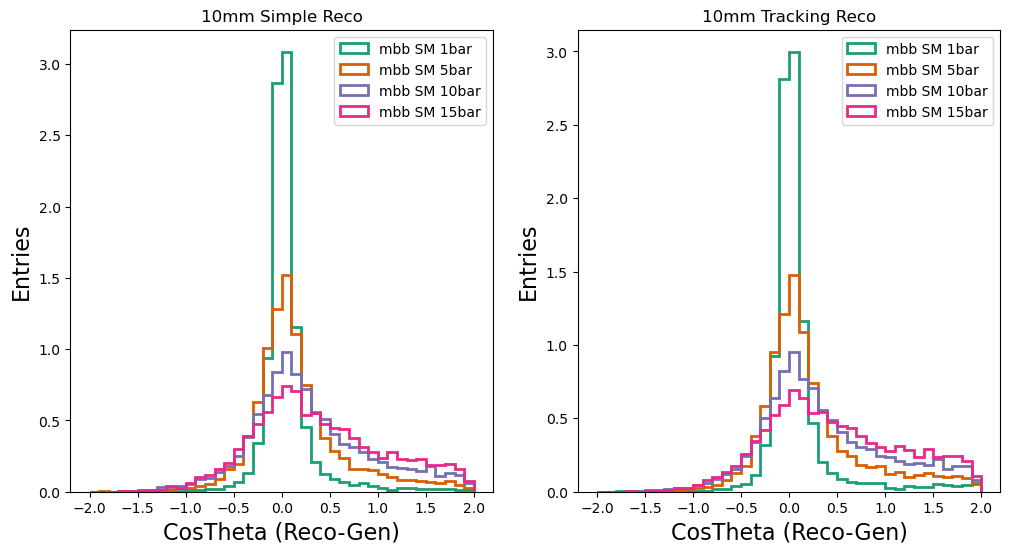

In [11]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
useLog=False
norm=True

for p in ["1bar", "5bar", "10bar", "15bar"]:
    PlotHistDiff(dfs,    "T1_reco", "T1_gen", "mbb", "SM", binsize, p, ax1, norm, useLog,  np.arange(-1,1,0.05), "T1 (Reco-Gen) [MeV]", "Entries", "pressure")
    ax1.set_title(binsize+" Simple Reco")
    PlotHistDiff(dfs_new,    "T1_reco", "T1_gen", "mbb", "SM", binsize, p, ax2, norm, useLog, np.arange(-1,1,0.05), "T1 (Reco-Gen) [MeV]", "Entries", "pressure")
    ax2.set_title(binsize+" Tracking Reco")

plt.savefig(f"../files/plots/T1_diff_SM_{binsize}.png", dpi=200)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))

for p in ["1bar", "5bar", "10bar", "15bar"]:
    PlotHistDiff(dfs,    "costheta_reco","costheta_gen", "mbb", "SM", binsize, p, ax1, norm, useLog, np.arange(-2,2.1,0.1), "CosTheta (Reco-Gen)", "Entries", "pressure")
    ax1.set_title(binsize+" Simple Reco")
    PlotHistDiff(dfs_new,    "costheta_reco","costheta_gen", "mbb", "SM", binsize, p, ax2, norm, useLog,  np.arange(-2,2.1,0.1), "CosTheta (Reco-Gen)", "Entries", "pressure")
    ax2.set_title(binsize+" Tracking Reco")

plt.savefig(f"../files/plots/Costheta_diff_SM_{binsize}.png", dpi=200)

,event_id,T1_gen,costheta_gen,T1_true,costheta_true,T1_reco,costheta_reco
0,0.0,1.569688,0.076792,1.569688,0.772683,1.414075,0.772683
1,1.0,1.528913,-0.271172,1.528913,0.036032,2.067028,0.036032
2,2.0,1.701973,0.382019,1.701973,0.695080,1.701972,0.695080
3,3.0,1.595677,0.695661,1.595677,0.413656,1.241144,0.413656
4,4.0,2.021093,-0.239735,2.021093,-0.365418,2.021093,-0.365418
...,...,...,...,...,...,...,...
9995,9995.0,1.993917,-0.853203,1.993917,-0.865125,1.993918,-0.865125
9996,9996.0,1.553097,0.111464,1.553097,-0.099573,1.625478,-0.099573
9997,9997.0,1.350799,0.178075,1.350799,-0.031523,1.411746,-0.031523
9998,9998.0,1.661566,-0.321053,1.661566,-0.089968,1.522503,-0.089968


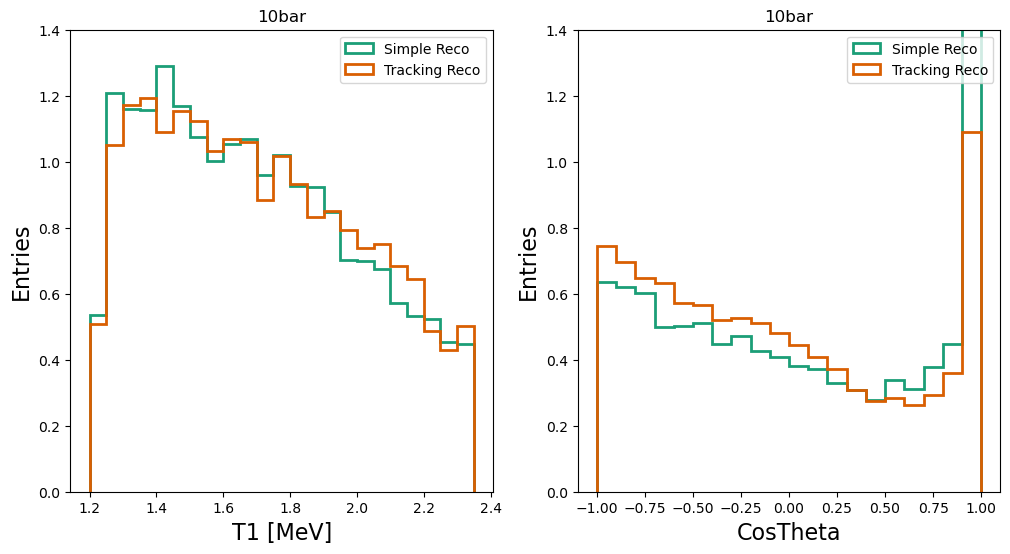

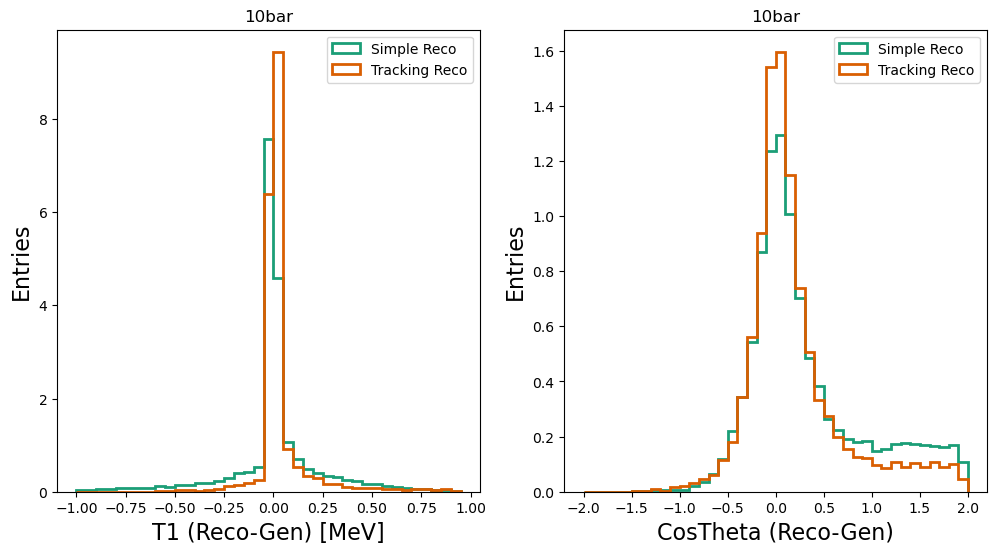

In [12]:
# Compare to the standard reconstruction using NEXUS hits

# nexus_df = pd.read_csv("../files/reco_v1/mbb_SM_10bar_nexus_reco_merged.txt", names=["event_id", "T1_gen", "costheta_gen", "T1_reco", "costheta_reco"])
nexus_df = pd.read_csv("../files/reco_v1/reco_mbb_10bar_vertex_seed_6mm.csv")
display(nexus_df)

nexus_df['Model'] = "mbb"
nexus_df['nme'] = "SM"
nexus_df['Pressure'] = "10bar"
nexus_df['binsize'] = "nexus"

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))

PlotHist(nexus_df,"T1_reco", "mbb", "SM", "nexus","10bar", ax1, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries", "Simple Reco")
PlotHist(dfs_new,"T1_reco", "mbb", "SM", "4mm","10bar", ax1, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries", "Tracking Reco")


PlotHist(nexus_df,"costheta_reco", "mbb", "SM", "nexus","10bar", ax2, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries", "Simple Reco")
PlotHist(dfs_new,"costheta_reco", "mbb", "SM", "4mm","10bar", ax2, norm, useLog, np.arange(-1,1.1,0.1),"CosTheta", "Entries", "Tracking Reco")

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))

PlotHistDiff(nexus_df,    "T1_reco", "T1_gen", "mbb", "SM","nexus","10bar", ax1, norm, useLog,  np.arange(-1,1,0.05), "T1 (Reco-Gen) [MeV]", "Entries", "Simple Reco")
PlotHistDiff(dfs_new,    "T1_reco", "T1_gen", "mbb", "SM","4mm","10bar", ax1, norm, useLog, np.arange(-1,1,0.05), "T1 (Reco-Gen) [MeV]", "Entries", "Tracking Reco")

PlotHistDiff(nexus_df,    "costheta_reco","costheta_gen", "mbb", "SM", "nexus","10bar", ax2, norm, useLog, np.arange(-2,2.1,0.1), "CosTheta (Reco-Gen)", "Entries", "Simple Reco")
PlotHistDiff(dfs_new,    "costheta_reco","costheta_gen", "mbb", "SM", "4mm","10bar", ax2, norm, useLog,  np.arange(-2,2.1,0.1), "CosTheta (Reco-Gen)", "Entries", "Tracking Reco")


In [13]:
T1_diff_old = np.mean((nexus_df['T1_reco'] - nexus_df['T1_gen']).to_numpy())
T1_diff_new = np.mean((dfs_new['T1_reco'] - dfs_new['T1_gen']).to_numpy())
print("T1 mean old, new",T1_diff_old, T1_diff_new)

costheta_diff_old = np.mean((nexus_df['costheta_reco'] - nexus_df['costheta_gen']).to_numpy())
costheta_diff_new = np.mean((dfs_new['costheta_reco'] - dfs_new['costheta_gen']).to_numpy())
print("Costheta mean old, new", costheta_diff_old, costheta_diff_new)

T1 mean old, new 0.0098795951128006 0.028125980768189705
Costheta mean old, new 0.31456643745275376 0.1325704568281197
